In [136]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import csv
import koreanize_matplotlib
from tabulate import tabulate

In [137]:
water = pymysql.connect(host = "172.20.145.44", user = "hwansun", password = "1234", db = "mini_project", charset = "utf8")

In [138]:
cur = water.cursor()
cur.execute("SELECT * FROM water")

68

In [139]:
rows = cur.fetchall()

In [140]:
water_df = pd.DataFrame(rows)
print(tabulate(water_df.head(), headers = "keys", tablefmt = "pretty"))

+---+------------+------+
|   |     0      |  1   |
+---+------------+------+
| 0 | Argentina  | 0.81 |
| 1 | Australia  | 1.96 |
| 2 |  Austria   | 1.04 |
| 3 | Azerbaijan | 0.6  |
| 4 |  Bahrain   | 0.52 |
+---+------------+------+


In [141]:
cur.close()
water.close()

In [142]:
water_df_sorted = water_df.sort_values(by=1, ascending=False)
top_10 = water_df_sorted.head(10)
bottom_10 = water_df_sorted.tail(10)

In [143]:
water_df_sorted

,0,1
53,Singapore,2.44
1,Australia,1.96
66,Uruguay,1.66
42,Norway,1.64
17,Finland,1.63
...,...,...
26,Indonesia,0.30
21,Greece,0.28
20,Ghana,0.26
41,Nigeria,0.13


C:\Users\hwans\AppData\Local\Temp\ipykernel_101164\1059887712.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


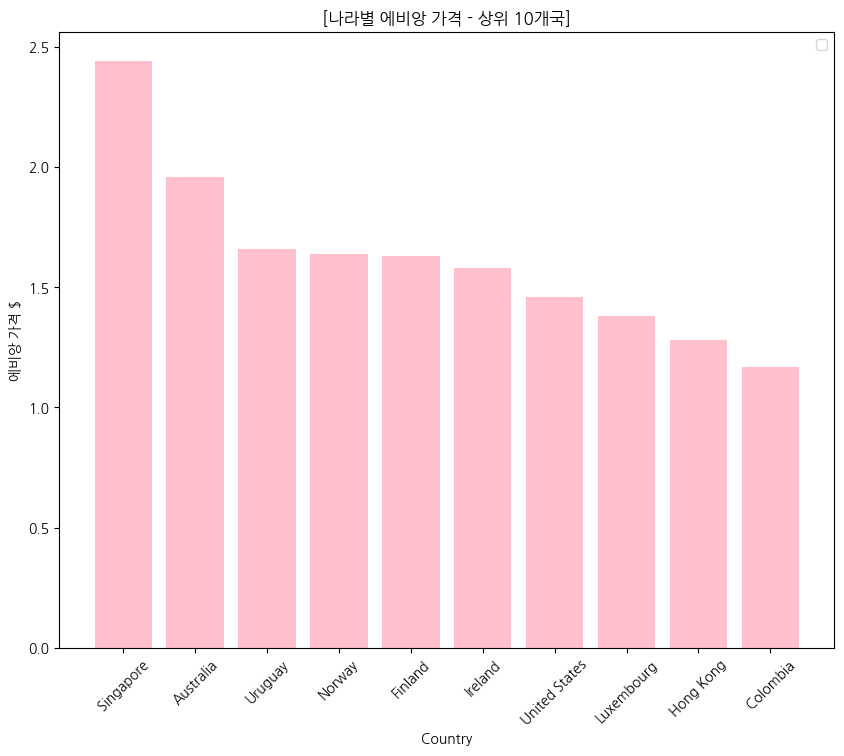

In [144]:
# 에비앙 가격 상위 10개국 추출 
plt.figure(figsize=(10, 8))
plt.bar(top_10[0], top_10[1], color='pink')
plt.xlabel('Country')
plt.ylabel("에비앙 가격 $")
plt.title('[나라별 에비앙 가격 - 상위 10개국]')
plt.xticks(rotation=45)
plt.legend()
plt.show()

C:\Users\hwans\AppData\Local\Temp\ipykernel_101164\2933427525.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


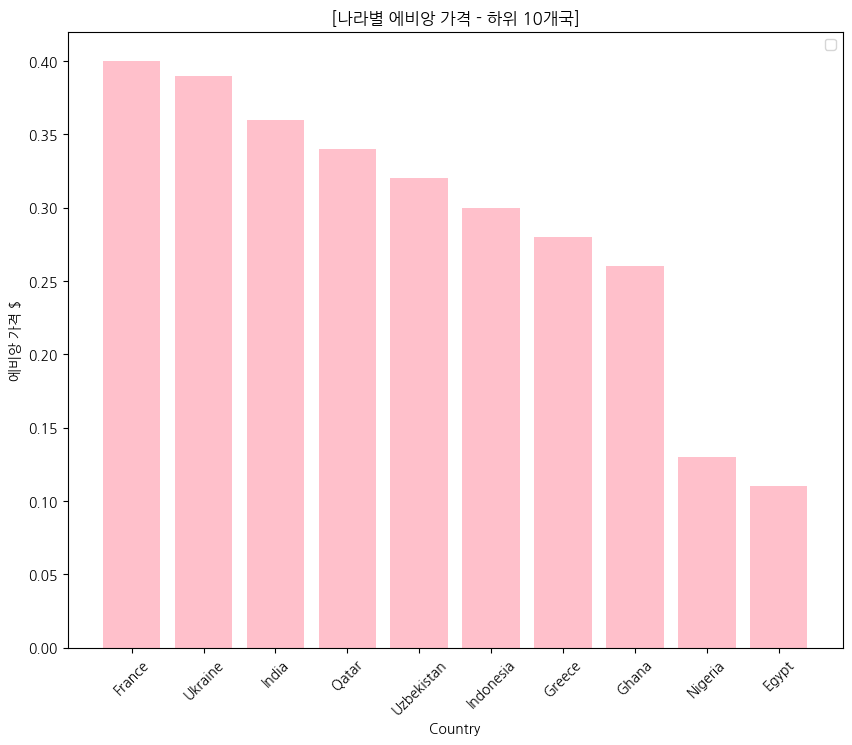

In [145]:
# 에비앙 가격 하위 10개국 추출
plt.figure(figsize=(10, 8))
plt.bar(bottom_10[0], bottom_10[1], color='pink')
plt.xlabel('Country')
plt.ylabel("에비앙 가격 $")
plt.title('[나라별 에비앙 가격 - 하위 10개국]')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [146]:
## 지하수 데이터 시각화
ground_Water = pymysql.connect(host = "172.20.145.44", user = "hwansun", password = "1234", db = "mini_project", charset = "utf8")

cur = ground_Water.cursor()
cur.execute("SELECT * FROM ground_water")

rows = cur.fetchall()

ground_Water_df = pd.DataFrame(rows)
print(tabulate(ground_Water_df.head(), headers = "keys", tablefmt = "pretty"))

+---+---------+----+----+
|   |    0    | 1  | 2  |
+---+---------+----+----+
| 0 | Austria | 95 | 85 |
| 1 | Belgium | 60 | 70 |
| 2 | Croatia | 70 | 75 |
| 3 | Czechia | 80 | 90 |
| 4 | Denmark | 85 | 60 |
+---+---------+----+----+


In [147]:
cur.close()
ground_Water.close()

In [148]:
ground_water_df_sorted = ground_Water_df.sort_values(by=1, ascending=False)

C:\Users\hwans\AppData\Local\Temp\ipykernel_101164\557164949.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


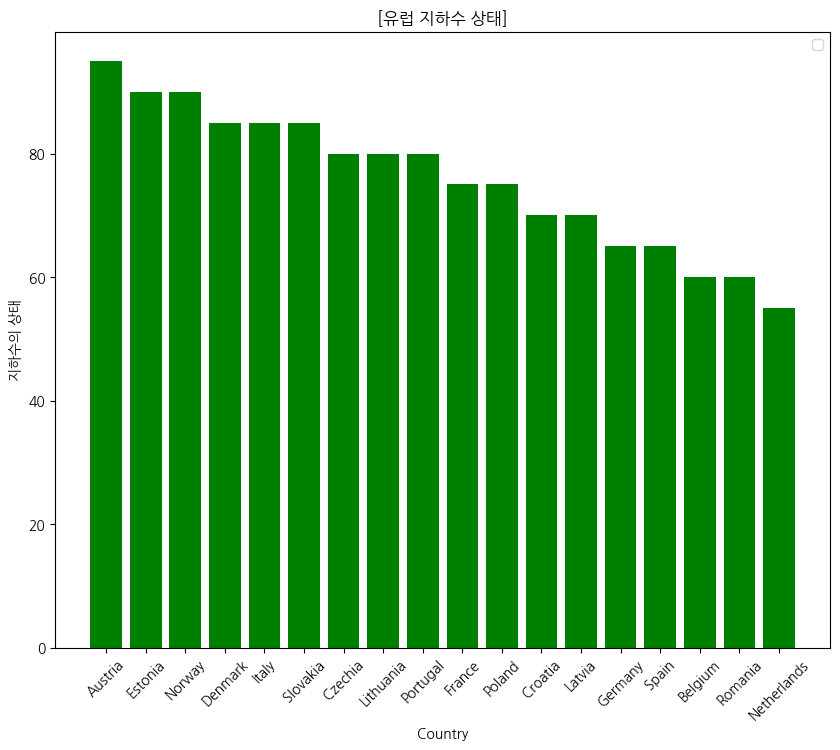

In [149]:
plt.figure(figsize=(10, 8))
plt.bar(ground_water_df_sorted[0], ground_water_df_sorted[1], color='green')
plt.xlabel('Country')
plt.ylabel("지하수의 상태")
plt.title('[유럽 지하수 상태]')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [150]:
# 국가별 GDP 
gdp = pymysql.connect(host = "172.20.145.44", user = "hwansun", password = "1234", db = "mini_project", charset = "utf8")

cur = gdp .cursor()
cur.execute("SELECT * FROM gdp_data")

rows = cur.fetchall()

gdp_df = pd.DataFrame(rows)
print(tabulate(gdp_df.head(), headers = "keys", tablefmt = "pretty"))

+---+-------------+--------------+----------+---------+---------+--------+
|   |      0      |      1       |    2     |    3    |    4    |   5    |
+---+-------------+--------------+----------+---------+---------+--------+
| 0 | Afghanistan | U.S. dollars | Billions | 14.467  |   n/a   |  n/a   |
| 1 |   Albania   | U.S. dollars | Billions | 19.083  | 22.743  | 25.431 |
| 2 |   Algeria   | U.S. dollars | Billions | 225.631 | 244.746 | 266.78 |
| 3 |   Andorra   | U.S. dollars | Billions |  3.376  |  3.726  | 3.897  |
| 4 |   Angola    | U.S. dollars | Billions | 122.826 | 94.381  | 92.123 |
+---+-------------+--------------+----------+---------+---------+--------+


In [151]:
cur.close()
gdp.close()

In [152]:
gdp_df = gdp_df[gdp_df[5] != 'n/a']

In [153]:
gdp_df[5] = gdp_df[5].str.replace(',', '').astype(float)

In [154]:
gdp_df_sorted = gdp_df.sort_values(by=5, ascending=False)
top_10 = gdp_df_sorted.head(10)

In [155]:
gdp_df_sorted.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [158]:
bottom_10_gdp = gdp_df[gdp_df[[0]].isin(bottom_10[[0]])]
bottom_10_countries = bottom_10[0].values

C:\Users\hwans\AppData\Local\Temp\ipykernel_101164\2708278041.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


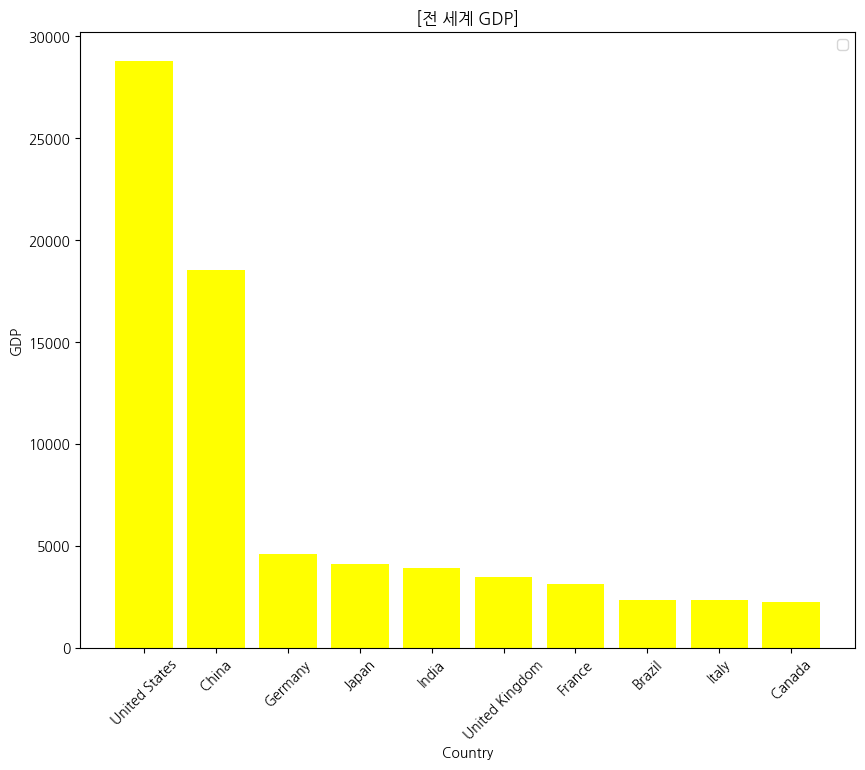

In [159]:
plt.figure(figsize=(10, 8))
plt.bar(top_10[0], top_10[5], color='yellow')
plt.xlabel('Country')
plt.ylabel("GDP")
plt.title('[전 세계 GDP]')
plt.xticks(rotation=45)
plt.legend()
plt.show()

+---+------------+-------+
|   |  Country   | Price |
+---+------------+-------+
| 0 | Argentina  | 0.81  |
| 1 | Australia  | 1.96  |
| 2 |  Austria   | 1.04  |
| 3 | Azerbaijan |  0.6  |
| 4 |  Bahrain   | 0.52  |
+---+------------+-------+
+---+-------------+--------------+----------+-----------+-----------+-----------+
|   |   Country   |    Units     |  Scale   | Year_2022 | Year_2023 | Year_2024 |
+---+-------------+--------------+----------+-----------+-----------+-----------+
| 0 | Afghanistan | U.S. dollars | Billions |  14.467   |    n/a    |    n/a    |
| 1 |   Albania   | U.S. dollars | Billions |  19.083   |  22.743   |  25.431   |
| 2 |   Algeria   | U.S. dollars | Billions |  225.631  |  244.746  |  266.78   |
| 3 |   Andorra   | U.S. dollars | Billions |   3.376   |   3.726   |   3.897   |
| 4 |   Angola    | U.S. dollars | Billions |  122.826  |  94.381   |  92.123   |
+---+-------------+--------------+----------+-----------+-----------+-----------+


C:\Users\hwans\AppData\Local\Temp\ipykernel_101164\3047906790.py:62: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "ro--" (-> linestyle='--'). The keyword argument will take precedence.
  ax2.plot(merged_df[columns_gdp[0]], merged_df[columns_gdp[5]], 'ro--', label='GDP', marker='o', linestyle='--', color='red')
C:\Users\hwans\AppData\Local\Temp\ipykernel_101164\3047906790.py:62: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro--" (-> marker='o'). The keyword argument will take precedence.
  ax2.plot(merged_df[columns_gdp[0]], merged_df[columns_gdp[5]], 'ro--', label='GDP', marker='o', linestyle='--', color='red')
C:\Users\hwans\AppData\Local\Temp\ipykernel_101164\3047906790.py:62: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro--" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(merged_df[columns_gdp[0]], merged_d

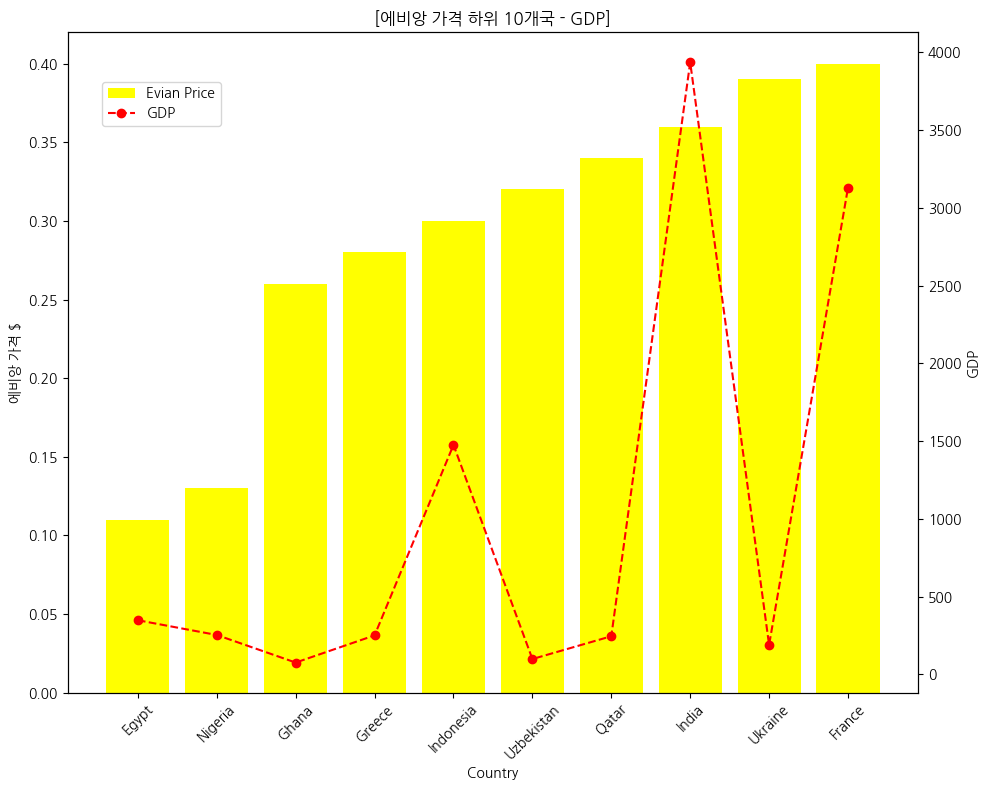

In [163]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
from tabulate import tabulate

# 에비앙 가격 데이터 가져오기
water = pymysql.connect(host="172.20.145.44", user="hwansun", password="1234", db="mini_project", charset="utf8")

cur = water.cursor()
cur.execute("SELECT * FROM water")

rows = cur.fetchall()
columns = [desc[0] for desc in cur.description]
water_df = pd.DataFrame(rows, columns=columns)
print(tabulate(water_df.head(), headers="keys", tablefmt="pretty"))

cur.close()
water.close()

# 에비앙 가격 데이터 정렬 및 하위 10개국 선택
water_df_sorted = water_df.sort_values(by=columns[1], ascending=True)
bottom_10 = water_df_sorted.head(10)

# 국가별 GDP 데이터 가져오기
gdp = pymysql.connect(host="172.20.145.44", user="hwansun", password="1234", db="mini_project", charset="utf8")

cur = gdp.cursor()
cur.execute("SELECT * FROM gdp_data")

rows = cur.fetchall()
columns_gdp = [desc[0] for desc in cur.description]
gdp_df = pd.DataFrame(rows, columns=columns_gdp)
print(tabulate(gdp_df.head(), headers="keys", tablefmt="pretty"))

cur.close()
gdp.close()

# 'n/a' 값을 포함하는 행 제거 및 쉼표 제거
gdp_df = gdp_df[gdp_df[columns_gdp[5]] != 'n/a']
gdp_df[columns_gdp[5]] = gdp_df[columns_gdp[5]].str.replace(',', '').astype(float)

# 에비앙 가격 하위 10개국의 GDP 데이터 추출
bottom_10_countries = bottom_10[columns[0]].values
bottom_10_gdp = gdp_df[gdp_df[columns_gdp[0]].isin(bottom_10_countries)]

# 데이터프레임 조인 (에비앙 가격과 GDP 데이터)
merged_df = bottom_10.merge(bottom_10_gdp, left_on=columns[0], right_on=columns_gdp[0])

# 시각화
fig, ax1 = plt.subplots(figsize=(10, 8))

# 에비앙 가격 막대그래프
ax1.bar(merged_df[columns[0]], merged_df[columns[1]], color='yellow', label='Evian Price')
ax1.set_xlabel('Country')
ax1.set_ylabel("에비앙 가격 $")
ax1.set_title('[에비앙 가격 하위 10개국 - GDP]')
ax1.tick_params(axis='x', rotation=45)

# y축 공유
ax2 = ax1.twinx()
ax2.plot(merged_df[columns_gdp[0]], merged_df[columns_gdp[5]], 'ro--', label='GDP', marker='o', linestyle='--', color='red')
ax2.set_ylabel("GDP")

# 범례 설정
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

+---+------------+-------+
|   |  Country   | Price |
+---+------------+-------+
| 0 | Argentina  | 0.81  |
| 1 | Australia  | 1.96  |
| 2 |  Austria   | 1.04  |
| 3 | Azerbaijan |  0.6  |
| 4 |  Bahrain   | 0.52  |
+---+------------+-------+
+---+-------------+--------------+----------+-----------+-----------+-----------+
|   |   Country   |    Units     |  Scale   | Year_2022 | Year_2023 | Year_2024 |
+---+-------------+--------------+----------+-----------+-----------+-----------+
| 0 | Afghanistan | U.S. dollars | Billions |  14.467   |    n/a    |    n/a    |
| 1 |   Albania   | U.S. dollars | Billions |  19.083   |  22.743   |  25.431   |
| 2 |   Algeria   | U.S. dollars | Billions |  225.631  |  244.746  |  266.78   |
| 3 |   Andorra   | U.S. dollars | Billions |   3.376   |   3.726   |   3.897   |
| 4 |   Angola    | U.S. dollars | Billions |  122.826  |  94.381   |  92.123   |
+---+-------------+--------------+----------+-----------+-----------+-----------+


C:\Users\hwans\AppData\Local\Temp\ipykernel_101164\1641324930.py:70: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "ro--" (-> linestyle='--'). The keyword argument will take precedence.
  ax2.plot(merged_df_europe[columns_gdp[0]], merged_df_europe[columns_gdp[5]], 'ro--', label='GDP', marker='o', linestyle='--', color='red')
C:\Users\hwans\AppData\Local\Temp\ipykernel_101164\1641324930.py:70: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro--" (-> marker='o'). The keyword argument will take precedence.
  ax2.plot(merged_df_europe[columns_gdp[0]], merged_df_europe[columns_gdp[5]], 'ro--', label='GDP', marker='o', linestyle='--', color='red')
C:\Users\hwans\AppData\Local\Temp\ipykernel_101164\1641324930.py:70: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro--" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(merged_

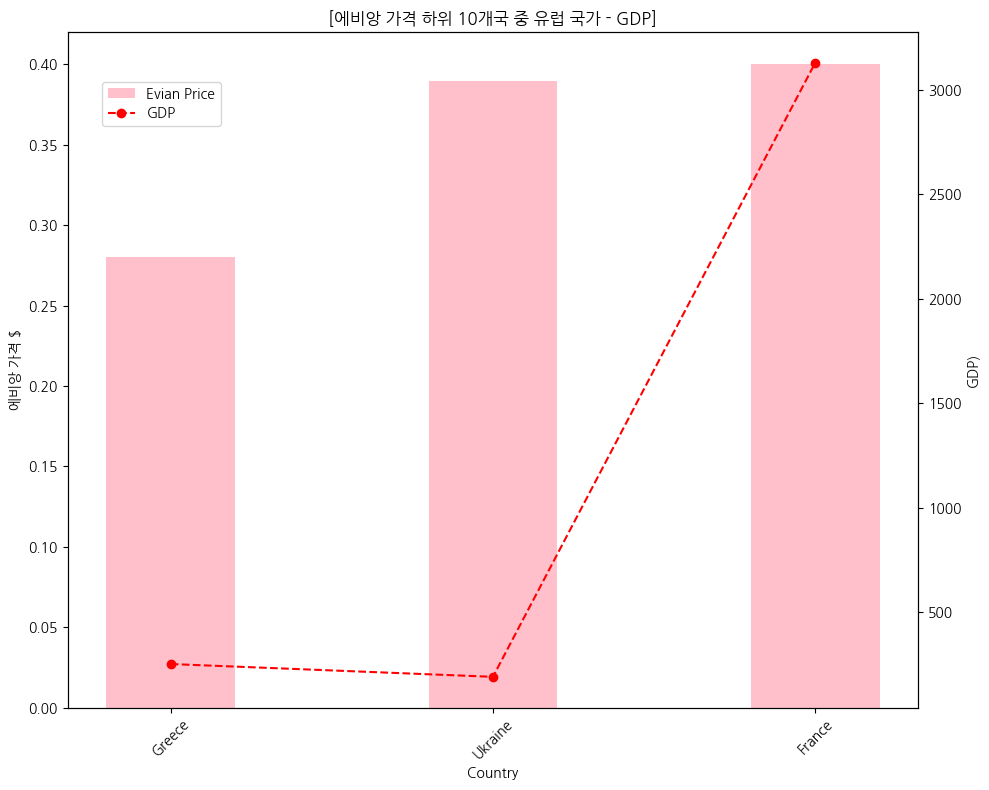

In [168]:
europe_countries = [
    "Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium", 
    "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czech Republic", 
    "Denmark", "Estonia", "Finland", "France", "Georgia", "Germany", "Greece", 
    "Hungary", "Iceland", "Ireland", "Italy", "Kazakhstan", "Kosovo", "Latvia", 
    "Liechtenstein", "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco", 
    "Montenegro", "Netherlands", "North Macedonia", "Norway", "Poland", "Portugal", 
    "Romania", "Russia", "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", 
    "Sweden", "Switzerland", "Turkey", "Ukraine", "United Kingdom"
]

# 에비앙 가격 데이터 가져오기
water = pymysql.connect(host="172.20.145.44", user="hwansun", password="1234", db="mini_project", charset="utf8")

cur = water.cursor()
cur.execute("SELECT * FROM water")

rows = cur.fetchall()
columns = [desc[0] for desc in cur.description]
water_df = pd.DataFrame(rows, columns=columns)
print(tabulate(water_df.head(), headers="keys", tablefmt="pretty"))

cur.close()
water.close()

# 에비앙 가격 데이터 정렬 및 하위 10개국 선택
water_df_sorted = water_df.sort_values(by=columns[1], ascending=True)
bottom_10 = water_df_sorted.head(10)

# 하위 10개국 중 유럽 국가 필터링
bottom_10_europe = bottom_10[bottom_10[columns[0]].isin(europe_countries)]

# 국가별 GDP 데이터 가져오기
gdp = pymysql.connect(host="172.20.145.44", user="hwansun", password="1234", db="mini_project", charset="utf8")

cur = gdp.cursor()
cur.execute("SELECT * FROM gdp_data")

rows = cur.fetchall()
columns_gdp = [desc[0] for desc in cur.description]
gdp_df = pd.DataFrame(rows, columns=columns_gdp)
print(tabulate(gdp_df.head(), headers="keys", tablefmt="pretty"))

cur.close()
gdp.close()

# 'n/a' 값을 포함하는 행 제거 및 쉼표 제거
gdp_df = gdp_df[gdp_df[columns_gdp[5]] != 'n/a']
gdp_df[columns_gdp[5]] = gdp_df[columns_gdp[5]].str.replace(',', '').astype(float)

# 에비앙 가격 하위 10개국의 유럽 국가들의 GDP 데이터 추출
bottom_10_europe_countries = bottom_10_europe[columns[0]].values
bottom_10_europe_gdp = gdp_df[gdp_df[columns_gdp[0]].isin(bottom_10_europe_countries)]

# 데이터프레임 조인 (에비앙 가격과 GDP 데이터)
merged_df_europe = bottom_10_europe.merge(bottom_10_europe_gdp, left_on=columns[0], right_on=columns_gdp[0])

# 시각화
fig, ax1 = plt.subplots(figsize=(10, 8))

# 에비앙 가격 막대그래프
ax1.bar(merged_df_europe[columns[0]], merged_df_europe[columns[1]], width=0.4, color='pink', label='Evian Price')
ax1.set_xlabel('Country')
ax1.set_ylabel("에비앙 가격 $")
ax1.set_title('[에비앙 가격 하위 10개국 중 유럽 국가 - GDP]')
ax1.tick_params(axis='x', rotation=45)

# y축 공유
ax2 = ax1.twinx()
ax2.plot(merged_df_europe[columns_gdp[0]], merged_df_europe[columns_gdp[5]], 'ro--', label='GDP', marker='o', linestyle='--', color='red')
ax2.set_ylabel("GDP)")

# 범례 설정
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

+---+------------+-------+
|   |  Country   | Price |
+---+------------+-------+
| 0 | Argentina  | 0.81  |
| 1 | Australia  | 1.96  |
| 2 |  Austria   | 1.04  |
| 3 | Azerbaijan |  0.6  |
| 4 |  Bahrain   | 0.52  |
+---+------------+-------+
Filtered Countries:
+----+---------+-------+
|    | Country | Price |
+----+---------+-------+
| 18 | France  |  0.4  |
+----+---------+-------+
Merged DataFrame:
+---+---------+-------+---------------------+
|   | Country | Price | Ground_Water_Status |
+---+---------+-------+---------------------+
| 0 | France  |  0.4  |         75          |
+---+---------+-------+---------------------+


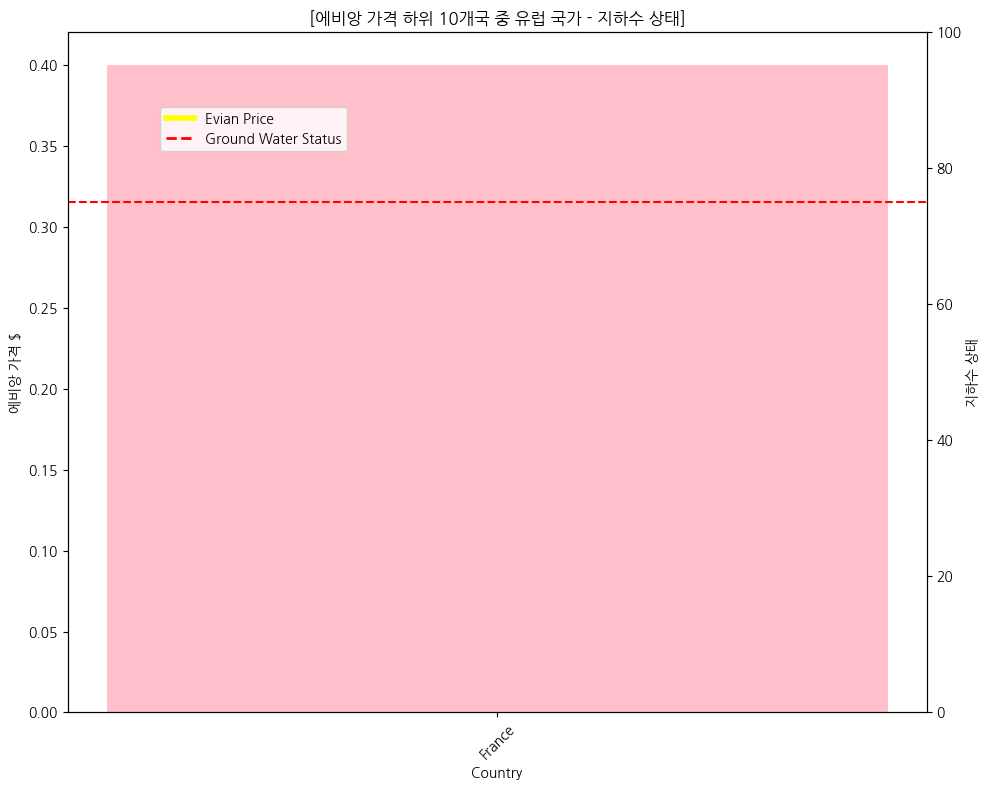

In [183]:
# 유럽 지하수 데이터
ground_water_data = {
    'Country': [
        'Austria', 'Belgium', 'Croatia', 'Czechia', 'Denmark', 'Estonia', 
        'France', 'Germany', 'Italy', 'Latvia', 'Lithuania', 'Netherlands', 
        'Poland', 'Portugal', 'Romania', 'Slovakia', 'Spain', 'Norway'
    ],
    'Ground_Water_Status': [
        95, 60, 70, 80, 85, 90, 75, 65, 85, 70, 80, 55, 75, 80, 60, 85, 65, 90
    ]
}
ground_water_df = pd.DataFrame(ground_water_data)

# 에비앙 가격 데이터 가져오기
water = pymysql.connect(host="172.20.145.44", user="hwansun", password="1234", db="mini_project", charset="utf8")

cur = water.cursor()
cur.execute("SELECT * FROM water")

rows = cur.fetchall()
columns = [desc[0] for desc in cur.description]
water_df = pd.DataFrame(rows, columns=columns)
print(tabulate(water_df.head(), headers="keys", tablefmt="pretty"))

cur.close()
water.close()

# 에비앙 가격 데이터 정렬 및 하위 10개국 선택
water_df_sorted = water_df.sort_values(by=columns[1], ascending=True)
bottom_10 = water_df_sorted.head(10)

# 하위 10개국 중 유럽 국가 필터링
europe_bottom_10 = bottom_10[bottom_10[columns[0]].isin(ground_water_df['Country'])]

# 데이터프레임 조인 (에비앙 가격과 지하수 상태 데이터)
merged_df = europe_bottom_10.merge(ground_water_df, left_on=columns[0], right_on='Country')

# 데이터 확인
print("Filtered Countries:")
print(tabulate(europe_bottom_10, headers="keys", tablefmt="pretty"))

print("Merged DataFrame:")
print(tabulate(merged_df, headers="keys", tablefmt="pretty"))

# 시각화
fig, ax1 = plt.subplots(figsize=(10, 8))

# 에비앙 가격 막대그래프
ax1.bar(merged_df[columns[0]], merged_df[columns[1]], width=0.2, color='pink', label='Evian Price')  # 막대 너비를 0.2로 설정
ax1.set_xlabel('Country')
ax1.set_ylabel("에비앙 가격 $")
ax1.set_title('[에비앙 가격 하위 10개국 중 유럽 국가 - 지하수 상태]')
ax1.tick_params(axis='x', rotation=45)

# y축 공유
ax2 = ax1.twinx()
for idx, country in enumerate(merged_df['Country']):
    ax2.axhline(y=merged_df.loc[merged_df['Country'] == country, 'Ground_Water_Status'].values[0], color='red', linestyle='--')
ax2.set_ylabel("지하수 상태")
ax2.set_ylim(0, 100)

# 범례 설정
custom_lines = [plt.Line2D([0], [0], color='yellow', lw=4),
                plt.Line2D([0], [0], color='red', linestyle='--', lw=2)]
ax1.legend(custom_lines, ['Evian Price', 'Ground Water Status'], loc='upper left', bbox_to_anchor=(0.1, 0.9))

fig.tight_layout()
plt.show()


+---+---------+----+----+
|   |    0    | 1  | 2  |
+---+---------+----+----+
| 0 | Austria | 95 | 85 |
| 1 | Belgium | 60 | 70 |
| 2 | Croatia | 70 | 75 |
| 3 | Czechia | 80 | 90 |
| 4 | Denmark | 85 | 60 |
+---+---------+----+----+


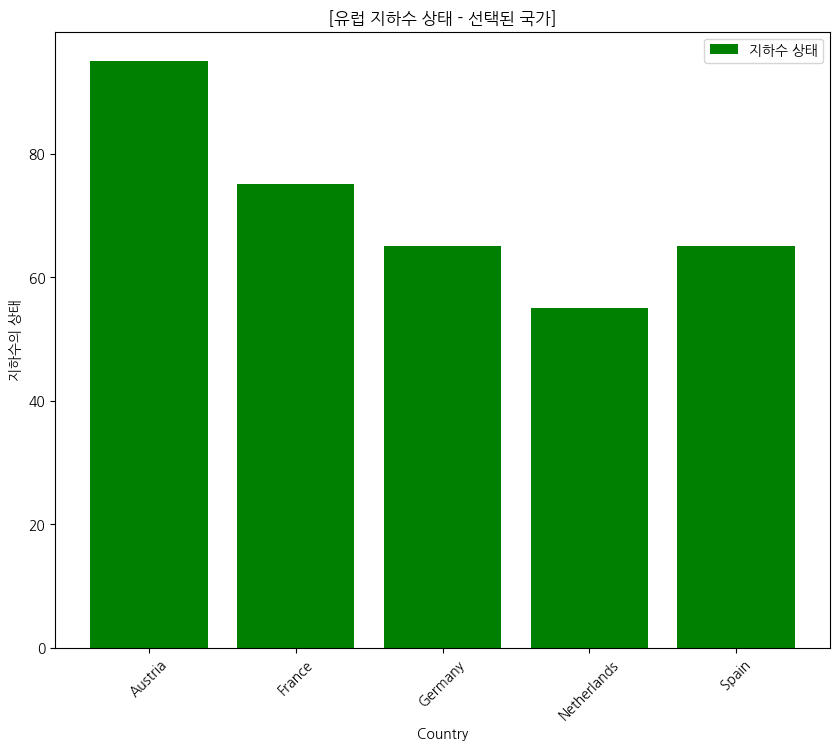

In [184]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# 데이터베이스 연결 및 지하수 데이터 가져오기
ground_Water = pymysql.connect(host="172.20.145.44", user="hwansun", password="1234", db="mini_project", charset="utf8")

cur = ground_Water.cursor()
cur.execute("SELECT * FROM ground_water")

rows = cur.fetchall()

ground_Water_df = pd.DataFrame(rows)
print(tabulate(ground_Water_df.head(), headers="keys", tablefmt="pretty"))

cur.close()
ground_Water.close()

# 특정 국가만 필터링
selected_countries = ['Austria', 'France', 'Germany', 'Spain', 'Netherlands']
filtered_ground_Water_df = ground_Water_df[ground_Water_df[0].isin(selected_countries)]

# 지하수 데이터 시각화
plt.figure(figsize=(10, 8))
plt.bar(filtered_ground_Water_df[0], filtered_ground_Water_df[1], color='green')
plt.xlabel('Country')
plt.ylabel("지하수의 상태")
plt.title('[유럽 지하수 상태 - 선택된 국가]')
plt.xticks(rotation=45)
plt.legend(["지하수 상태"])
plt.show()


+---+---------+----+----+
|   |    0    | 1  | 2  |
+---+---------+----+----+
| 0 | Austria | 95 | 85 |
| 1 | Belgium | 60 | 70 |
| 2 | Croatia | 70 | 75 |
| 3 | Czechia | 80 | 90 |
| 4 | Denmark | 85 | 60 |
+---+---------+----+----+


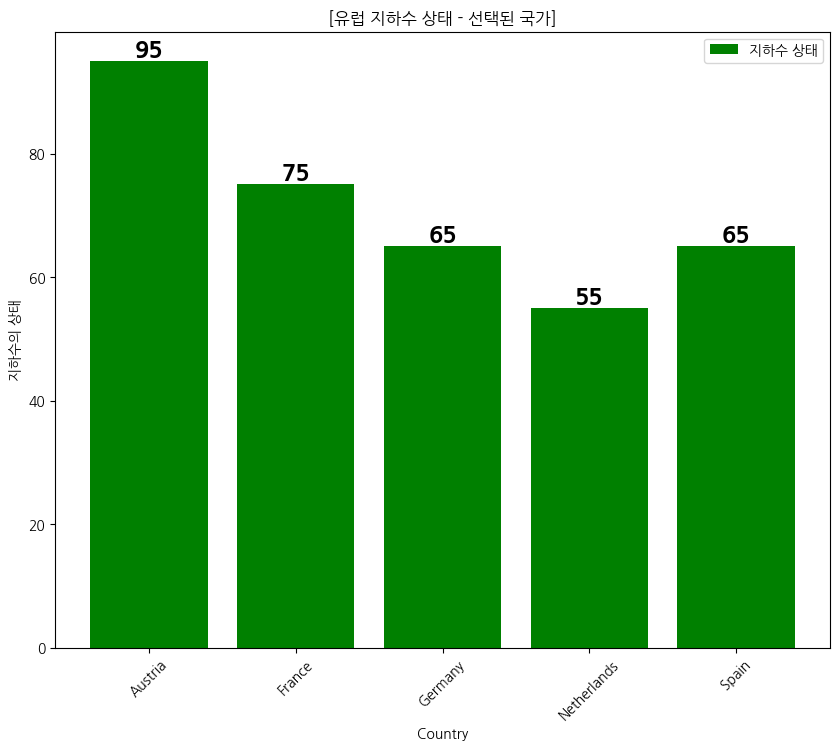

In [188]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# 데이터베이스 연결 및 지하수 데이터 가져오기
ground_Water = pymysql.connect(host="172.20.145.44", user="hwansun", password="1234", db="mini_project", charset="utf8")

cur = ground_Water.cursor()
cur.execute("SELECT * FROM ground_water")

rows = cur.fetchall()

ground_Water_df = pd.DataFrame(rows)
print(tabulate(ground_Water_df.head(), headers="keys", tablefmt="pretty"))

cur.close()
ground_Water.close()

# 특정 국가만 필터링
selected_countries = ['Austria', 'France', 'Germany', 'Spain', 'Netherlands']
filtered_ground_Water_df = ground_Water_df[ground_Water_df[0].isin(selected_countries)]

# 지하수 데이터 시각화
plt.figure(figsize=(10, 8))
bars = plt.bar(filtered_ground_Water_df[0], filtered_ground_Water_df[1], color='green')
plt.xlabel('Country')
plt.ylabel("지하수의 상태")
plt.title('[유럽 지하수 상태 - 선택된 국가]')
plt.xticks(rotation=45)
plt.legend(["지하수 상태"])

# 막대 위에 수치 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=17, fontweight='bold')

plt.show()
